<a href="https://colab.research.google.com/github/ArnavGhosh999/CODSOFT--Task-2/blob/main/SMS_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_filename = '/content/spam.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(data_filename, encoding='ISO-8859-1')

In [ ]:
df

,v1,v2,num_chars,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,3
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,5
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,3
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1


In [ ]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(5572, 5)
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                              

In [ ]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
df.sample(5)

,v1,v2
393,ham,Yes i think so. I am in office but my lap is i...
1603,ham,Have you heard about that job? I'm going to th...
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1901,ham,"Sorry, I'll call later"
5213,ham,3 pa but not selected.


In [ ]:
df.dropna()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape


(5169, 2)

In [ ]:
print(df['v1'].value_counts())

ham     4516
spam     653
Name: v1, dtype: int64


([<matplotlib.patches.Wedge at 0x7895b3dc5630>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

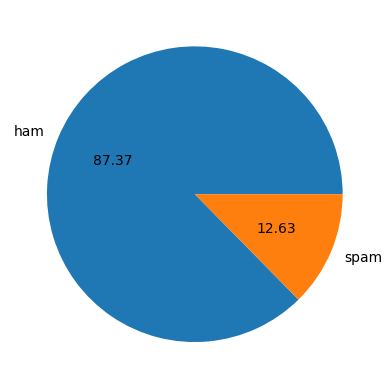

In [ ]:
plt.pie(df['v1'].value_counts(), labels=['ham','spam'],autopct = "%0.2f")


In [ ]:
def count_characters(text):
    return len(str(text))

def count_words(text):
    return len(str(text).split())

def count_sentences(text):
    import re
    sentences = re.split(r'[.!?]+', str(text))
    return len([s for s in sentences if s.strip()])

In [ ]:
df['num_chars'] = df['v2'].apply(count_characters)
df['num_words'] = df['v2'].apply(count_words)
df['num_sentences'] = df['v2'].apply(count_sentences)

In [ ]:
df['num_chars'] = df['num_chars'].astype(int)
df['num_words'] = df['num_words'].astype(int)
df['num_sentences'] = df['num_sentences'].astype(int)

In [ ]:
!pip install viridis
import viridis

  Preparing metadata (setup.py) ... done
  Created wheel for viridis: filename=viridis-0.5.0-py3-none-any.whl size=3631 sha256=0c465c42418c5cd92764dc35328b050f87b22a0fb3832d39918c5ff944d582a2
  Stored in directory: /root/.cache/pip/wheels/2d/df/dc/4a09d10bd163308ba0712e28168afc57fb76c850099e69321d
Successfully built viridis


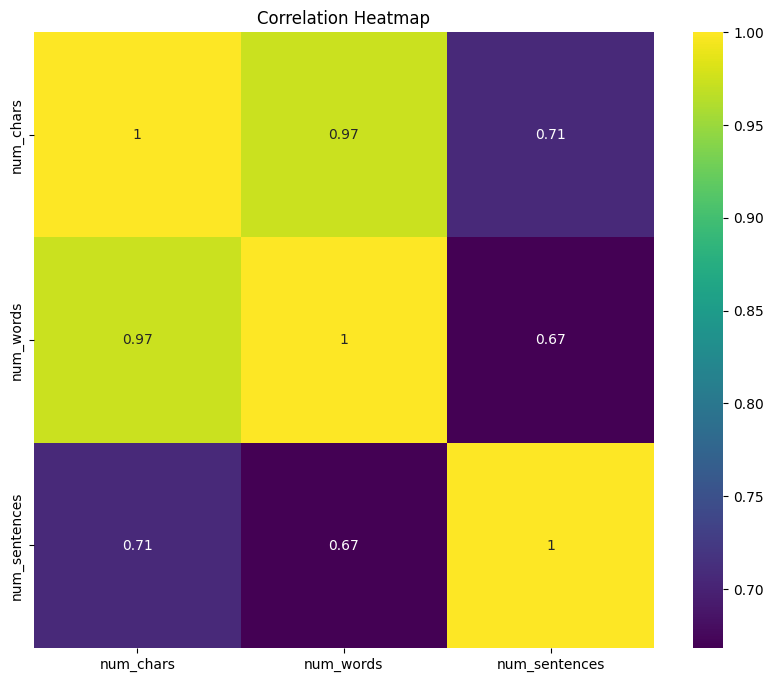

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['num_chars', 'num_words', 'num_sentences']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

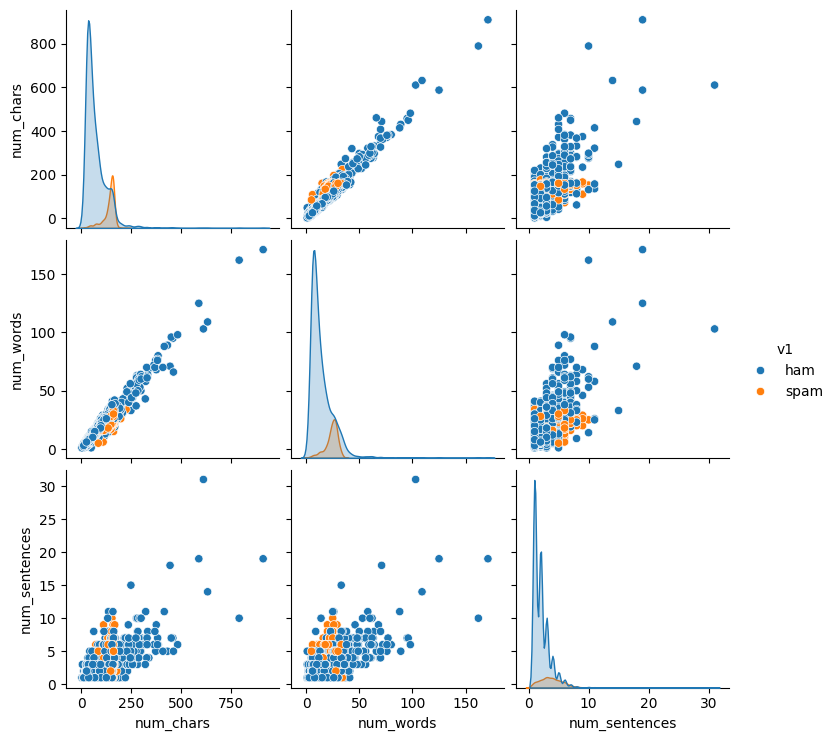

In [ ]:
sns.pairplot(df,hue='v1')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()


    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return" ".join(y)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Performing Bag-of-Words(BoW)...
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]


count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(corpus)

# Vocabulary
bow_vocab = count_vectorizer.get_feature_names_out()

print("Bag-of-Words (BoW) Representation:")
print(X_bow.toarray())
print("Vocabulary:")
print(bow_vocab)

Bag-of-Words (BoW) Representation:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# Displaying the TF-IDF representation and vocabulary
print("\nTF-IDF Representation:")
print(X_tfidf.toarray())
print("Vocabulary:")
print(tfidf_vocab)



TF-IDF Representation:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
Vocabulary:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
common_words = []
for word in tfidf_vocab:
  if word in bow_vocab:
    common_words.append(word)

df['v2'] = df['v2'].apply(transform_text)

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['v2'])

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['v2'])

tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

for word in tfidf_vocab:
  if word in bow_vocab:
    common_words.append(word)

print("Common words used in both BoW and TF-IDF representations:")
print(common_words)

Common words used in both BoW and TF-IDF representations:
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this', 'document', 'first', 'one', 'second']


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transform_text']= df['v2'].apply(transform_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'transform_text' is a column containing text data in your DataFrame
text_data = df['transform_text'].tolist()

# Create an instance of CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data
X = cv.fit_transform(text_data).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

y = df['v1'].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=2)
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB ()

In [ ]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
pos_label = 'spam'
print(precision_score(y_test, y_pred1, pos_label=pos_label))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test, y_pred2, pos_label=pos_label)*100)

0.9642166344294004
[[871  25]
 [ 12 126]]
98.6409966024915


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
if isinstance(pos_label, list):
    pos_label = pos_label[0]

# Calculate precision score using the corrected pos_label value
precision = precision_score(y_test, y_pred3, pos_label=pos_label)
# Print the precision score
print(precision*100)

0.9700193423597679
[[893   3]
 [ 28 110]]
96.95982627578718


In [ ]:
print(precision_score(y_test,y_pred3,average=None)*100)

[96.95982628 97.34513274]


In [ ]:
print(precision_score(y_test,y_pred3,pos_label='ham')*100)

96.95982627578718
